<a href="https://colab.research.google.com/github/RockyHero1/Stroke-Prediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/train_strokes.csv')

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [ ]:
data.shape

(43400, 12)

In [ ]:
#Getting null values of every attribute
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
#Filling the missing BMI values with mean of the data
mean = data["bmi"].mean()
data["bmi"].fillna(value=mean, inplace=True)

In [ ]:
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
#Filling missing smoking statues using the most common value
data["smoking_status"].fillna(data["smoking_status"].value_counts().index[0], inplace=True)

In [ ]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.shape

(43400, 12)

In [ ]:
data["stroke"].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

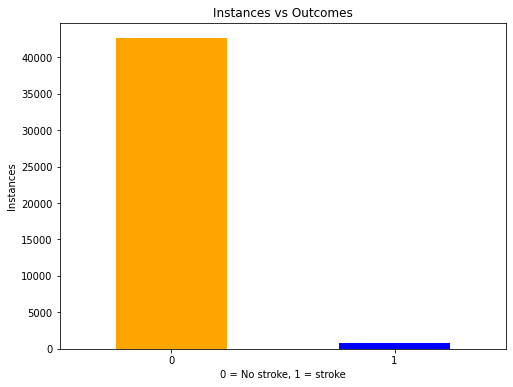

In [ ]:
#Plotting a bar-graph for the target column
data["stroke"].value_counts().plot(kind="bar", color=["orange", "blue"], figsize=(8,6))
plt.xlabel("0 = No stroke, 1 = stroke")
plt.ylabel("Instances")
plt.title("Instances vs Outcomes")
plt.xticks(rotation=0)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     43400 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,43400.0,36326.142350,21072.134879,1.00,18038.50,36351.50,54514.25,72943.00
age,43400.0,42.217894,22.519649,0.08,24.00,44.00,60.00,82.00
hypertension,43400.0,0.093571,0.291235,0.00,0.00,0.00,0.00,1.00
heart_disease,43400.0,0.047512,0.212733,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,43400.0,104.482750,43.111751,55.00,77.54,91.58,112.07,291.05
bmi,43400.0,28.605038,7.638023,10.10,23.40,28.10,32.60,97.60
stroke,43400.0,0.018041,0.133103,0.00,0.00,0.00,0.00,1.00


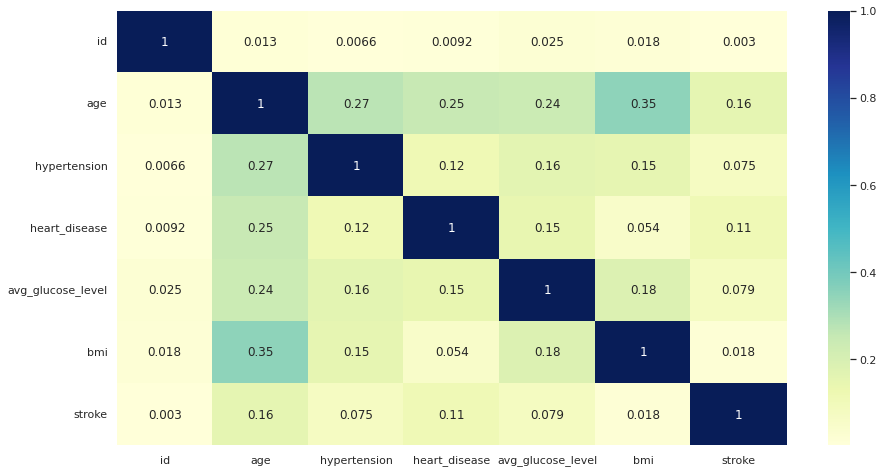

In [ ]:
#Plotting a heatmap for the correlation matrix
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True);

In [ ]:
data["gender"].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [ ]:
data["ever_married"].value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

In [ ]:
data["work_type"].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [ ]:
data["Residence_type"].value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

In [ ]:
#Using label encoding for converting categorical values to numeric
le = preprocessing.LabelEncoder()

data["gender"] = le.fit_transform(data["gender"])
data["ever_married"] = le.fit_transform(data['ever_married'])
data["work_type"] = le.fit_transform(data["work_type"])
data["Residence_type"] = le.fit_transform(data["Residence_type"])
data["smoking_status"] = le.fit_transform(data["smoking_status"])

In [ ]:
data["gender"].unique()

array([1, 0, 2])

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,1,0


In [ ]:
pd.crosstab(data["stroke"], data["gender"])

gender,0,1,2
stroke,,,
0,25234,17372,11
1,431,352,0


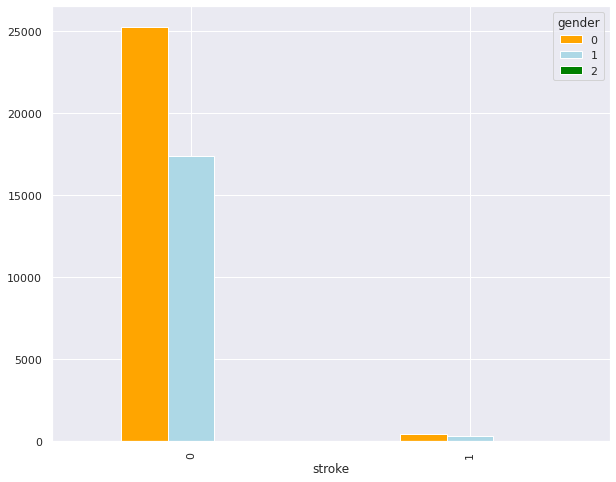

In [ ]:
#Plotting a bar graph for gender
pd.crosstab(data["stroke"], data["gender"]).plot(kind="bar",
                                                figsize=(10,8),
                                                color=["Orange", "lightblue", "green"])
plt.show()

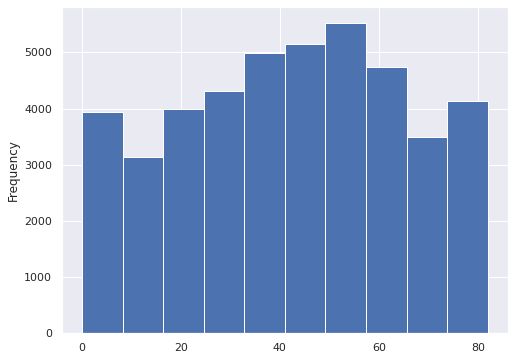

In [ ]:
#Plotting histogram for age based on frequency
data.age.plot.hist(figsize=(8,6));

In [ ]:
#Splitting data into X & y
X = data.drop("stroke", axis=1)
y = data["stroke"]

In [ ]:
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,1
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,1
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,1
...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10.0,0,0,0,4,1,58.64,20.4,1
43396,5450,0,56.0,0,0,1,0,1,213.61,55.4,0
43397,28375,0,82.0,1,0,1,2,1,91.94,28.9,0
43398,27973,1,40.0,0,0,1,2,1,99.16,33.2,1


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 43400, dtype: int64

In [ ]:
y.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [ ]:
#Using Standard scaler for preprocessing
scaler = preprocessing.StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(X))

#scaler = preprocessing.MinMaxScaler()
#scaled = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
X = scaled
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.268469,1.201081,-1.741517,-0.321296,-0.223342,-1.344203,1.659945,-1.002584,-0.217176,-1.388469,0.037722
1,-0.278007,1.201081,0.700823,3.112398,-0.223342,0.743935,-0.169637,0.997423,-0.383258,1.387150,0.037722
2,-0.939789,-0.830841,-1.519486,-0.321296,-0.223342,-1.344203,-0.169637,0.997423,0.148621,-1.440839,0.037722
3,0.959423,-0.830841,1.233697,-0.321296,-0.223342,0.743935,-0.169637,-1.002584,-0.822123,0.955096,-1.720761
4,0.465542,1.201081,-1.253049,-0.321296,-0.223342,-1.344203,-1.084428,-1.002584,1.317458,-1.244451,0.037722


In [ ]:
#Splitting data into train & test data 
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Oversampling using SMOTE for minority label to balance the dataset

#oversample = RandomOverSampler(sampling_strategy="minority")
#X_train, y_train = oversample.fit_resample(X_train, y_train)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#undersample = NearMiss()
#X_train, y_train = undersample.fit_resample(X_train, y_train)

In [ ]:
models = {"RF": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "DT": DecisionTreeClassifier()}

In [ ]:
def finding_scores(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_results = {}
    
    for i, model in models.items():
        model.fit(X_train, y_train)
        model_results[i] = model.score(X_test, y_test)
    return model_results

In [ ]:
model_results = finding_scores(models = models,
                               X_train = X_train,
                               X_test = X_test,
                               y_train = y_train,
                               y_test = y_test)
model_results

{'DT': 0.9496543778801844, 'KNN': 0.8895161290322581, 'RF': 0.9626728110599079}

In [ ]:
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [ ]:
np.random.seed(42)
for i, model in models.items():
    if i == "RF":
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)
        print("Random Forest:")
        print("Accuracy: ", accuracy_score(y_test, y_pred))
        print("Recall: ", recall_score(y_test, y_pred, average="weighted"))
        print("Precision: ", precision_score(y_test, y_pred, average="weighted"))
        print("F1 Score: ", f1_score(y_test, y_pred, average="weighted"))
        print()
    elif i == "KNN":
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        print("KNN:")
        print("Accuracy: ", accuracy_score(y_test, y_pred))
        print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
        print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
        print("F1 Score: ", f1_score(y_test, y_pred, average= 'weighted'))
        print()
    elif i == "DT":
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        print("Decision Tree:")
        print("Accuracy: ", accuracy_score(y_test, y_pred))
        print("Recall: ", recall_score(y_test, y_pred, average="weighted"))
        print("Precision: ", precision_score(y_test, y_pred, average="weighted"))
        print("F1 Score: ", f1_score(y_test, y_pred, average= 'weighted'))

Random Forest:
Accuracy:  0.9626728110599079
Recall:  0.9626728110599079
Precision:  0.9650238309552788
F1 Score:  0.9638422828556222

KNN:
Accuracy:  0.8895161290322581
Recall:  0.8895161290322581
Precision:  0.9684852568082666
F1 Score:  0.9254635819820145

Decision Tree:
Accuracy:  0.9496543778801844
Recall:  0.9496543778801844
Precision:  0.965583593479015
F1 Score:  0.9573956688780504


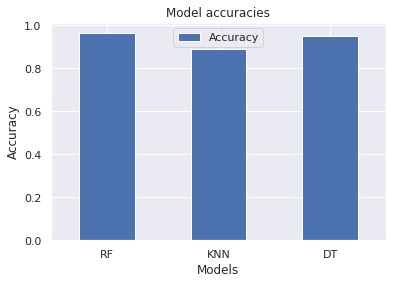

In [ ]:
#Comparinge the model accuracies
model_compare = pd.DataFrame(model_results, index=["Accuracy"])
model_compare.T.plot(kind='bar', figsize=(6,4))
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.title("Model accuracies")
plt.show()

In [ ]:
#Getting AUC scores of models
np.random.seed(42)
for i, model in models.items():
    if i == 'RF':
        rf_prob = rfc.predict_proba(X_test)
        rf_prob = rf_prob[:, 1]
        rf_auc = roc_auc_score(y_test, rf_prob)
        print("Random Forest ROC AUC: ", rf_auc)
    elif i == 'KNN':
        knn_prob = knn.predict_proba(X_test)
        knn_prob = knn_prob[:, 1]
        knn_auc = roc_auc_score(y_test, knn_prob)
        print("KNN ROC AUC: ", knn_auc)
    elif i == 'DT':
        dt_prob = dt.predict_proba(X_test)
        dt_prob = dt_prob[:, 1]
        dt_auc = roc_auc_score(y_test, dt_prob)
        print("Decision Tree ROC AUC: ", dt_auc)

Random Forest ROC AUC:  0.793249142034721
KNN ROC AUC:  0.6345654835118285
Decision Tree ROC AUC:  0.535598176965045


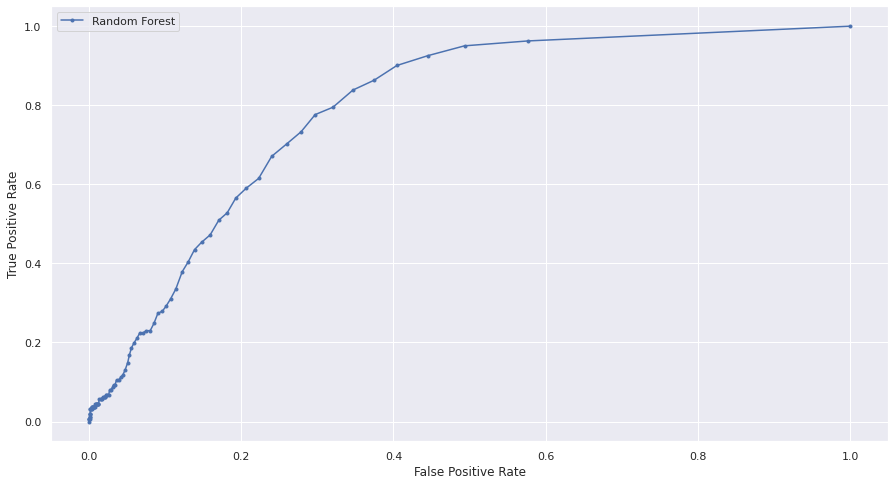

In [ ]:
#Plotting the roc curve for Random Forest
fpr, tpr, _ =  roc_curve(y_test, rf_prob)
plt.plot(fpr, tpr, marker=".", label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

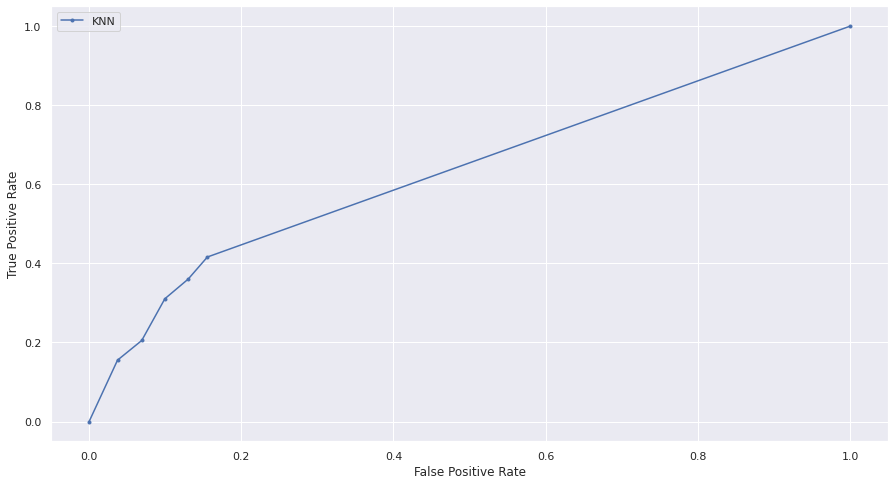

In [ ]:
#Plotting the roc curve for KNN
fpr, tpr, _ =  roc_curve(y_test, knn_prob)
plt.plot(fpr, tpr, marker=".", label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

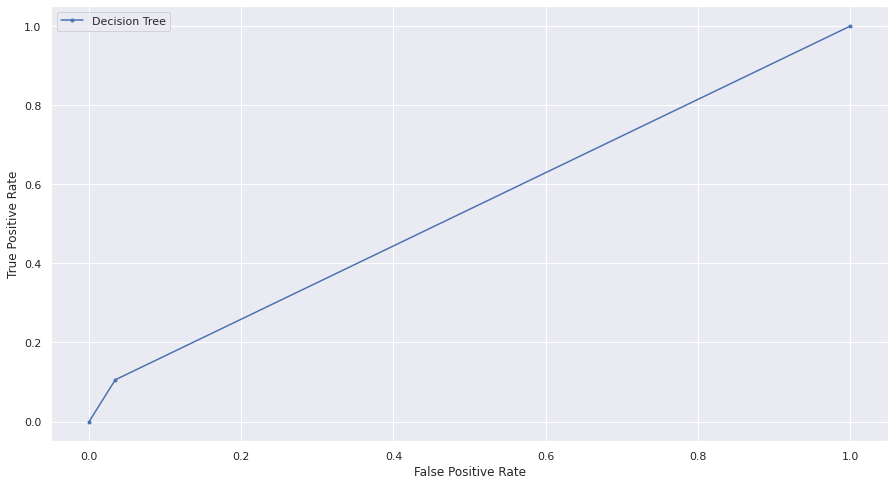

In [ ]:
#Plotting the roc curve for Decision Tree
fpr, tpr, _ =  roc_curve(y_test, dt_prob)
plt.plot(fpr, tpr, marker=".", label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
# Using XGBoost model for our data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
np.random.seed(42)

y_pred = xgb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average= 'weighted'))

Accuracy:  0.8429723502304147
Recall:  0.8429723502304147
Precision:  0.9725374484846585
F1 Score:  0.8989980211680736


In [ ]:
#Getting AUC score for XGBoost
np.random.seed(42)

xgb_prob = xgb.predict_proba(X_test)
xgb_prob = xgb_prob[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_prob)
print("XGBoost ROC AUC: ", xgb_auc)

XGBoost ROC AUC:  0.8078449414133844


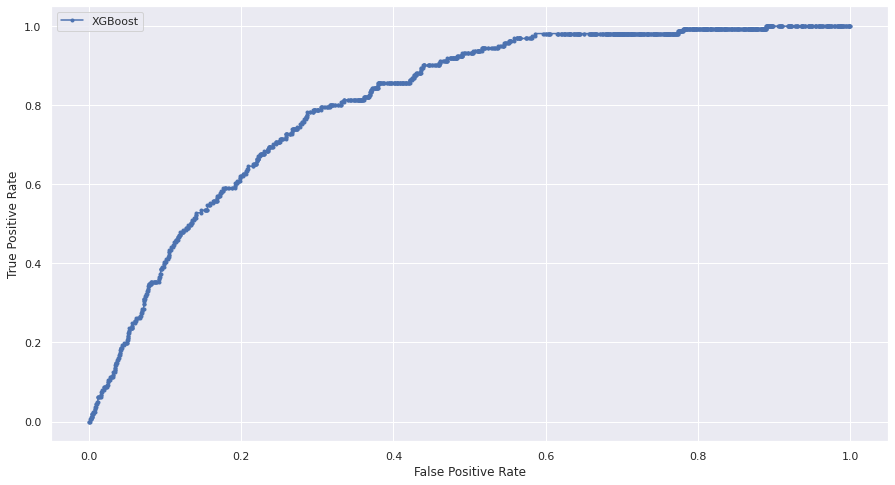

In [ ]:
#Plotting roc curve for XGBoost
fpr, tpr, _ =  roc_curve(y_test, xgb_prob)
plt.plot(fpr, tpr, marker=".", label="XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
# Using Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
np.random.seed(42)

y_pred = gbc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average= 'weighted'))

Accuracy:  0.853110599078341
Recall:  0.853110599078341
Precision:  0.972736801738624
F1 Score:  0.9050193828271318


In [ ]:
#Getting AUC score for GBC
np.random.seed(42)

gbc_prob = gbc.predict_proba(X_test)
gbc_prob = gbc_prob[:, 1]
gbc_auc = roc_auc_score(y_test, gbc_prob)
print("GBC ROC AUC: ", gbc_auc)

GBC ROC AUC:  0.8072492688976558


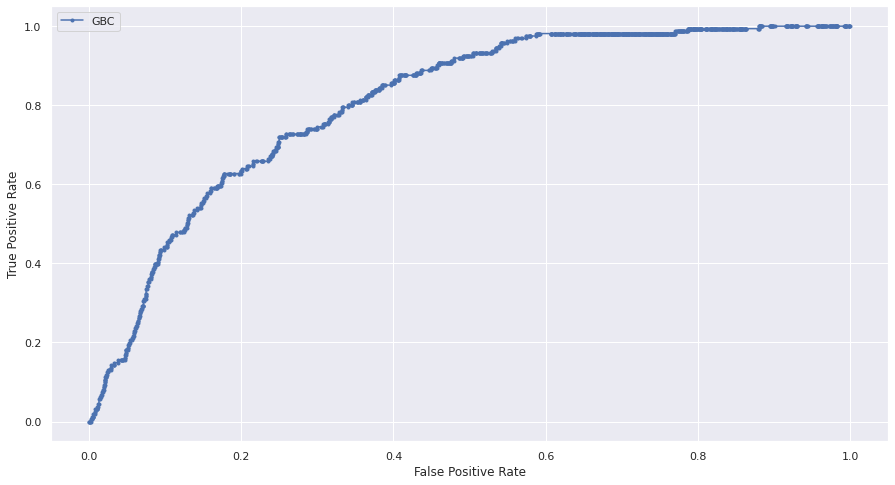

In [ ]:
fpr, tpr, _ =  roc_curve(y_test, gbc_prob)
plt.plot(fpr, tpr, marker=".", label="GBC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
#Hyper-parameter tuning for XGBoost model

In [ ]:
#Making grid of parameters
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
#Using GridSearch for hyperparameter tuning 
np.random.seed(42)

xgb_2 = XGBClassifier()
grid = GridSearchCV(xgb_2, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='roc_auc')

In [ ]:
np.random.seed(42)
grid.score(X_test, y_test)

0.7881345242895128

In [ ]:
grid.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 0,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [ ]:
#Modifying grid to different values 
param_grid["scale_pos_weight"] = [3]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]

param_grid["gamma"] = [3, 5, 7]
param_grid["max_depth"] = [9 , 15, 20]
param_grid["reg_lambda"] = [10, 30, 50]
param_grid["learning_rate"] = [0.3, 0.5, 0.7, 1]

In [ ]:
#Using another GridSearch for modified grid
np.random.seed(42)

grid2 = GridSearchCV(xgb_2, param_grid, cv=3, scoring="roc_auc", n_jobs=-1)
grid2.fit(X_train,y_train) 

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [3, 5, 7],
                         'learning_rate': [0.3, 0.5, 0.7, 1],
                         'max_depth': [9, 15, 20], 'reg_lambda': [10, 30, 50],
                         'scale_pos_weight': [3], 'subsample': [0.8]},
             scoring='roc_auc')

In [ ]:
grid2.score(X_test, y_test)

0.791279121058591

In [ ]:
grid2.best_params_

{'colsample_bytree': 0.5,
 'gamma': 3,
 'learning_rate': 0.3,
 'max_depth': 15,
 'reg_lambda': 10,
 'scale_pos_weight': 3,
 'subsample': 0.8}

In [ ]:
#Using second GridSearch for final model
np.random.seed(42)

xgb3 = XGBClassifier( **grid2.best_params_)
xgb3.fit(X_train, y_train)
np.random.seed(42)

pred = xgb3.predict(X_test)
print("Accuracy: " , accuracy_score(y_test, pred))
print("Recall: " , recall_score(y_test, pred, average="weighted"))
print("Precision: " , precision_score(y_test, pred, average="weighted"))
print("F1 Score: " , f1_score(y_test, pred, average="weighted"))

Accuracy:  0.9716589861751153
Recall:  0.9716589861751153
Precision:  0.9659354211730776
F1 Score:  0.9687221441890371


In [ ]:
#Saving model to file
from joblib import dump, load

dump(xgb3, filename="ml-project.joblib")

['ml-project.joblib']